# LeetCode

## Link

1. https://leetcode.com/

2. https://leetcode-cn.com/

## Demo

1. https://www.onlinegdb.com/

## Details

LeetCode: 85, 152

# LeetCode 85. Maximal Rectangle 最大矩形

Given a rows x cols binary matrix filled with 0's and 1's, find the largest rectangle containing only 1's and return its area.

给定一个仅包含 0 和 1 、大小为 rows x cols 的二维二进制矩阵，找出只包含 1 的最大矩形，并返回其面积。


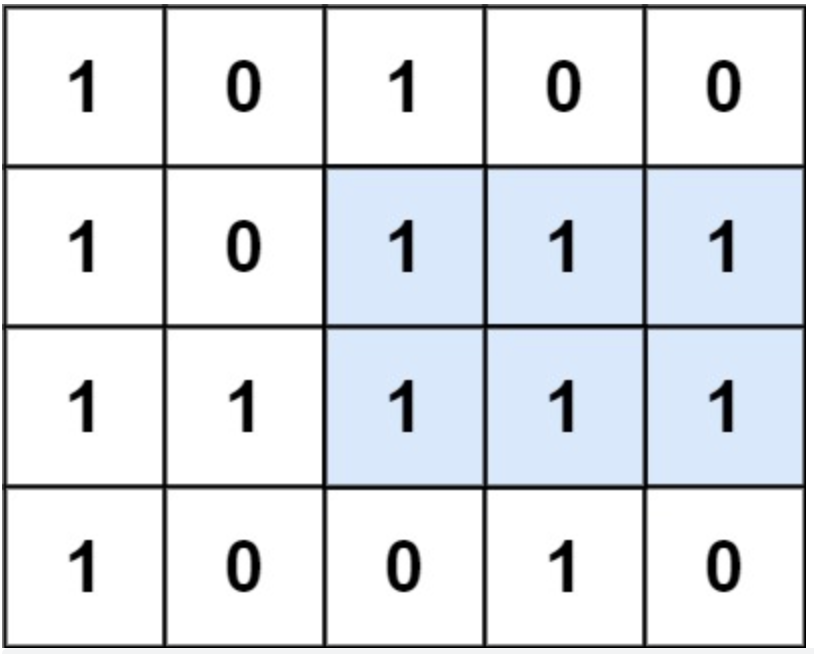

Example 1:

```
Input: matrix = [["1","0","1","0","0"],["1","0","1","1","1"],["1","1","1","1","1"],["1","0","0","1","0"]]
Output: 6
Explanation: The maximal rectangle is shown in the above picture.
```

最大矩形如上图所示。

Example 2:

```
Input: matrix = []
Output: 0
```

Example 3:

```
Input: matrix = [["0"]]
Output: 0
```

Example 4:

```
Input: matrix = [["1"]]
Output: 1
```

Example 5:

```
Input: matrix = [["0","0"]]
Output: 0
```

Constraints:

- rows == matrix.length

- cols == matrix[i].length

- 1 <= row, cols <= 200

- matrix[i][j] is '0' or '1'.



In [1]:
from typing import List
class Solution:
    def maximalRectangle(self, matrix: List[List[str]]) -> int:
        if not matrix or not matrix[0]:
            return 0
        nums = [int(''.join(row), base=2) for row in matrix] # 先将每一行变成2进制的数字
        ans, N = 0, len(nums)
        for i in range(N):# 遍历每一行，求以这一行为第一行的最大矩形
            j, num = i, nums[i]
            while j < N: # 依次与下面的行进行与运算。
                num = num & nums[j]  # num 中为1的部分，说明上下两行该位置都是1，相当于求矩形的高，高度为j-i+1
                # print('num=',bin(num))
                if not num: # 没有1说明没有涉及第i到第j行的竖直矩形
                    break
                width, curnum = 0, num
                while curnum: 
                    # 将cursum与自己右移一位进行&操作。如果有两个1在一起，那么cursum才为1，相当于求矩形宽度
                    width += 1
                    curnum = curnum & (curnum >> 1)
                    # print('curnum',bin(curnum))
                ans = max(ans, width * (j-i+1))
                # print('i','j','width',i,j,width)
                # print('ans=',ans)
                j += 1
        return ans

In [2]:
class Solution:
    def maximalRectangle(self, matrix) -> int:
        if len(matrix) == 0:
            return 0
        res = 0
        m, n = len(matrix), len(matrix[0])
        heights = [0] * n
        for i in range(m):
            for j in range(n):
                if matrix[i][j] == '0':
                    heights[j] = 0
                else:
                    heights[j] = heights[j] + 1
            res = max(res, self.largestRectangleArea(heights))
        return res

    def largestRectangleArea(self, heights):
        heights.append(0)
        stack = []
        res = 0
        for i in range(len(heights)):
            while stack and heights[i] < heights[stack[-1]]:
                s = stack.pop()
                res = max(res, heights[s] * ((i - stack[-1] - 1) if stack else i))
            stack.append(i)
        return res

# LeetCode 152. Maximum Product Subarray 乘积最大子数组

Given an integer array nums, find a contiguous non-empty subarray within the array that has the largest product, and return the product.

The test cases are generated so that the answer will fit in a 32-bit integer.

A subarray is a contiguous subsequence of the array.

给你一个整数数组 nums ，请你找出数组中乘积最大的非空连续子数组（该子数组中至少包含一个数字），并返回该子数组所对应的乘积。

测试用例的答案是一个 32-位 整数。

子数组 是数组的连续子序列。


Example 1:

```
Input: nums = [2,3,-2,4]
Output: 6
Explanation: [2,3] has the largest product 6.
```

子数组 [2,3] 有最大乘积 6。

Example 2:

```
Input: nums = [-2,0,-1]
Output: 0
Explanation: The result cannot be 2, because [-2,-1] is not a subarray.
```

结果不能为 2, 因为 [-2,-1] 不是子数组。

Constraints:

- $1 <= nums.length <= 2 * 10^{4}$

- -10 <= nums[i] <= 10

- The product of any prefix or suffix of nums is guaranteed to fit in a 32-bit integer.

nums 的任何前缀或后缀的乘积都 保证 是一个 32-位 整数


## 解题思路

1. 给定一个整数数组 nums ，找出一个序列中乘积最大的连续子序列（该序列至少包含一个数）。

2. 给出一个数组，要求找出这个数组中连续元素乘积最大的值。

3. 这一题是 DP 的题，状态转移方程是：最大值是 Max(f(n)) = Max( Max(f(n-1)) * n, Min(f(n-1)) * n)；最小值是 Min(f(n)) = Min( Max(f(n-1)) * n, Min(f(n-1)) * n)。只要动态维护这两个值，如果最后一个数是负数，最大值就在负数 * 最小值中产生，如果最后一个数是正数，最大值就在正数 * 最大值中产生。

In [3]:
class Solution:
    def maxProduct(self, A):
        B = A[::-1]
        for i in range(1, len(A)):
            A[i] *= A[i - 1] or 1
            B[i] *= B[i - 1] or 1
        return max(max(A),max(B)) 